<a href="https://colab.research.google.com/github/YVS26/Machine-Learning/blob/master/Breast_Cancer_Detection_with_SVM_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import numpy
import matplotlib
import pandas
import sklearn
print('python: {}',format(sys.version))
print('Numpy :{}',format(numpy.__version__))
print('matplotlib :{}',format(matplotlib.__version__))
print('pandas :{}',format(pandas.__version__))
print('sklearn :{}',format(sklearn.__version__))

python: {} 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Numpy :{} 1.17.4
matplotlib :{} 3.1.2
pandas :{} 0.25.3
sklearn :{} 0.21.3


In [0]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id','clump_thickness','uniform_cell_size','uniform_cell_shape',
       'marginal_adhesion','single_ethelial_size','bare_nuclei',
       'bland_chromatin','normal_nucleoli','mitoses','class']
df=pd.read_csv(url,names=names)       

In [5]:
df

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_ethelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
df.replace('?',-99999,inplace=True)
print(df.axes)
df.drop(['id'],1,inplace=True)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_ethelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [7]:
print(df.loc[0])

clump_thickness         5
uniform_cell_size       1
uniform_cell_shape      1
marginal_adhesion       1
single_ethelial_size    2
bare_nuclei             1
bland_chromatin         3
normal_nucleoli         1
mitoses                 1
class                   2
Name: 0, dtype: object


In [8]:
print(df.loc[698])

clump_thickness          4
uniform_cell_size        8
uniform_cell_shape       8
marginal_adhesion        5
single_ethelial_size     4
bare_nuclei              5
bland_chromatin         10
normal_nucleoli          4
mitoses                  1
class                    4
Name: 698, dtype: object


In [9]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_ethelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


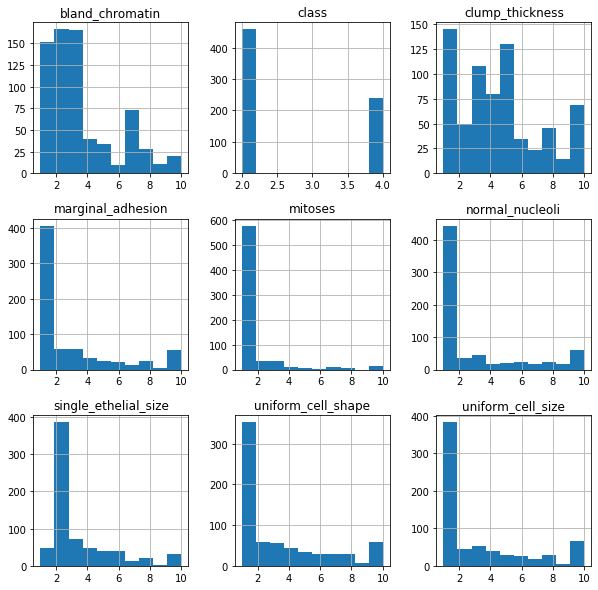

In [10]:
#plot histogram for each variables
df.hist(figsize=(10,10))
plt.show()

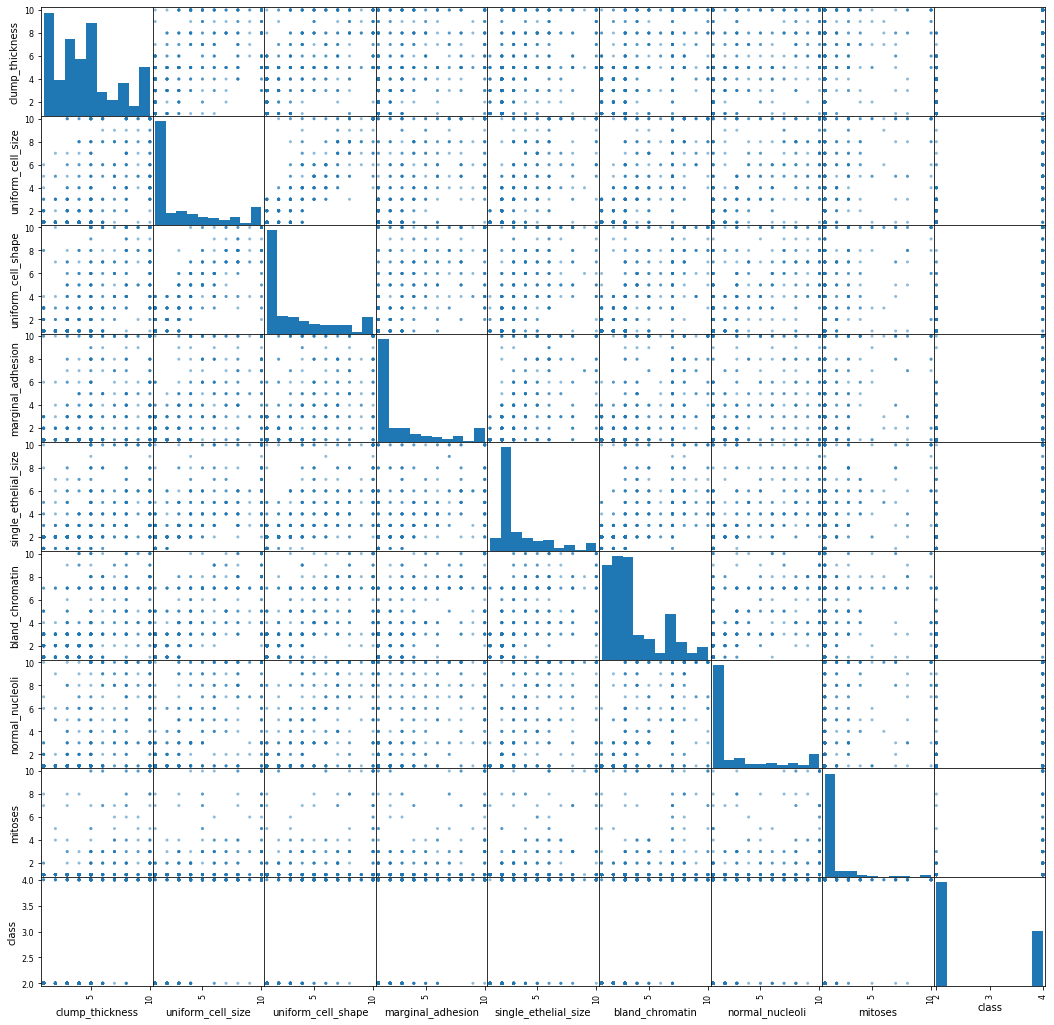

In [11]:
# create scatter plot matrix
scatter_matrix(df,figsize=(18,18))
plt.show()

In [0]:
# create x and y for training data
from sklearn.model_selection import train_test_split
X=np.array(df.drop(['class'],1))
y=np.array(df['class'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [0]:
seed=8
scoring = 'accuracy'

In [27]:
# Define models to train
models = []
models.append(('KNN',sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))
results =[]
names = []

for name,model in models:
  kfold = model_selection.KFold(n_splits=10,random_state=seed)
  cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s :%f (%f)" % (name,cv_results.mean(),cv_results.std())
  print(msg)

KNN :0.971396 (0.025492)
SVM :0.955325 (0.027920)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [29]:
for name,model in models:
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  print(name)
  print(accuracy_score(y_test,predictions))
  print(classification_report(y_test,predictions))

KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       0.98      0.99      0.98        97
           4       0.98      0.95      0.96        43

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.97       140
weighted avg       0.98      0.98      0.98       140

SVM
0.9714285714285714
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        97
           4       0.93      0.98      0.95        43

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
clf = SVC()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)
example = np.array([[4,2,1,1,1,2,3,2,10]])
example = example.reshape(len(example),-1)
prediction = clf.predict(example)
print(prediction)

0.9714285714285714
[4]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
